In [1]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [39]:
IMAGE_FILES = ['image_test/tom_hanks.jpg','image_test/ikhbarnew.jpg','image_test/kate_winslet.jpg']
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

face_landmarks: landmark {
  x: 0.4893369972705841
  y: 0.6564008593559265
  z: -0.048094332218170166
}
landmark {
  x: 0.46506962180137634
  y: 0.6070526838302612
  z: -0.1339797079563141
}
landmark {
  x: 0.4736603796482086
  y: 0.6190258264541626
  z: -0.06534601747989655
}
landmark {
  x: 0.43154290318489075
  y: 0.539386510848999
  z: -0.11056619137525558
}
landmark {
  x: 0.4595796763896942
  y: 0.5866562128067017
  z: -0.14567582309246063
}
landmark {
  x: 0.4542640149593353
  y: 0.5582205653190613
  z: -0.14073437452316284
}
landmark {
  x: 0.44372260570526123
  y: 0.48891738057136536
  z: -0.08944036811590195
}
landmark {
  x: 0.28932589292526245
  y: 0.49475547671318054
  z: 0.028522195294499397
}
landmark {
  x: 0.4350202679634094
  y: 0.4461287260055542
  z: -0.08247465640306473
}
landmark {
  x: 0.4290185570716858
  y: 0.4210793972015381
  z: -0.09311088174581528
}
landmark {
  x: 0.40702542662620544
  y: 0.3111732602119446
  z: -0.08894279599189758
}
landmark {
  x: 0.490

In [3]:
def get_facemesh_coords(landmark_list, img):
    """Extract FaceMesh landmark coordinates into 468x3 NumPy array.
    """
    h, w = img.shape[:2]  # grab width and height from image
    xyz = [(lm.x, lm.y, lm.z) for lm in landmark_list.landmark]

    return np.multiply(xyz, [w, h, w]).astype(int)

In [4]:
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
    # img = plt.imread('image_test/ikhbarnew.jpg')
    # baba = face_mesh.process(img)
    # coord = get_facemesh_coords(baba.multi_face_landmarks[0],img)
    img_path = 'data_image'
    X = []
    y = []
    for celeb in os.listdir(img_path):
        path_ = img_path + '/' + celeb
        list_image = os.listdir(path_)
        if '.ipynb_checkpoints' in list_image:
            list_image.remove('.ipynb_checkpoints')
        else: pass    
        for img in list_image:
            full_path = path_ + '/' + img
            img_array = cv2.imread(full_path)
            result = face_mesh.process(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
            coord = get_facemesh_coords(result.multi_face_landmarks[0],img_array).reshape(-1,)
            if type(img_array) == np.ndarray:
                y_label = celeb
                X.append(coord)
                y.append(y_label)
            else: pass

In [5]:
X_array = np.array(X)
y_array = np.array(y)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
import pandas as pd

encoder = LabelEncoder()
scaler = StandardScaler()
y_encoded = encoder.fit_transform(y_array)

y_ohe = pd.get_dummies(y_encoded).values

X_scaled = scaler.fit_transform(X_array)

In [31]:
#instantiate the model 
svc_clf = SVC(C=10,kernel='linear',probability=True)
#fit the model
svc_clf.fit(X_scaled,y_array)

SVC(C=10, kernel='linear', probability=True)

In [32]:
preds_svc_train = svc_clf.predict(X_scaled)
print('Train accuracy SVC:',accuracy_score(y_array,preds_svc_train))

Train accuracy SVC: 1.0


In [98]:
import pickle
with open('face_svc_ikh_toni_facemesh.pkl', 'wb') as file_1:
  pickle.dump(svc_clf, file_1)

In [23]:
from playsound import playsound

def prepare_to_predict_cam(image,model):
    scaler = StandardScaler()
    with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
        result = face_mesh.process(image)
        coord = get_facemesh_coords(result.multi_face_landmarks[0],image).reshape(-1,)
        coord = np.expand_dims(coord,axis = 0)
        coord_scaled = scaler.fit_transform(coord)
        preds = model.predict(coord_scaled)
        preds_proba = round(np.max(model.predict_proba(coord_scaled)),2)
        if preds_proba > 0.5:
            #image = cv2.rectangle(image,(x1,y1),(x2,y2),(255,0,0),8)
            image = cv2.putText(image, preds[0] + ' ' +str(preds_proba), (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (36,255,12), 3)
            playsound('beep-warning-6387.mp3')
            return image,preds[0]
        else: pass
        
import pandas as pd
from datetime import datetime

def add_attendance(nickname):
    data_karyawan = pd.read_csv('data_staff/data_karyawan.csv',sep=';')
    now = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
    date_att = now[:10]
    time_att = now[-8:]

    # data_attendance = pd.DataFrame({})
    # data_attendance.to_csv('data_staff/data_attendance.csv')
    data_attendance = pd.read_csv('data_staff/data_attendance.csv')

    if nickname in data_karyawan.nickname.unique():
        print(f'Welcome {nickname}, attendance time: {now}')
        data_nickname = data_karyawan.loc[data_karyawan.nickname == nickname,['id','fullname','role']]
        data_nickname['date'] = date_att
        data_nickname['time'] = time_att
        data_attendance = pd.concat([data_attendance,data_nickname],axis=0)
        data_attendance.id = data_attendance.id.astype('int64')
        data_attendance.reset_index(drop=True)
        data_attendance.to_csv('data_staff/data_attendance.csv',index=False)
        path_ = nickname+'_'+str(data_nickname.id.iloc[0])+'_'+now.replace(' ','_').replace(':','-').replace('/','-')
        return path_,date_att.replace('/','-')
    else:
        print(f'{nickname} tidak terdaftar !!')


(array([[[218, 215, 204],
         [228, 204, 213],
         [239, 195, 223],
         ...,
         [123, 157, 164],
         [111, 145, 178],
         [106, 141, 174]],
 
        [[224, 212, 198],
         [233, 206, 207],
         [242, 200, 216],
         ...,
         [132, 157, 160],
         [127, 145, 172],
         [120, 138, 165]],
 
        [[252, 216, 188],
         [247, 212, 193],
         [243, 210, 200],
         ...,
         [139, 165, 153],
         [131, 161, 152],
         [120, 151, 141]],
 
        ...,
 
        [[150, 120, 155],
         [154, 128, 153],
         [156, 135, 150],
         ...,
         [ 66,  78,  86],
         [ 69,  80,  88],
         [ 73,  84,  91]],
 
        [[152, 116, 163],
         [156, 126, 160],
         [156, 133, 155],
         ...,
         [ 45,  58,  68],
         [ 69,  86,  90],
         [ 71,  88,  92]],
 
        [[159, 150, 124],
         [164, 146, 140],
         [164, 139, 152],
         ...,
         [ 59,  97,  71],
  

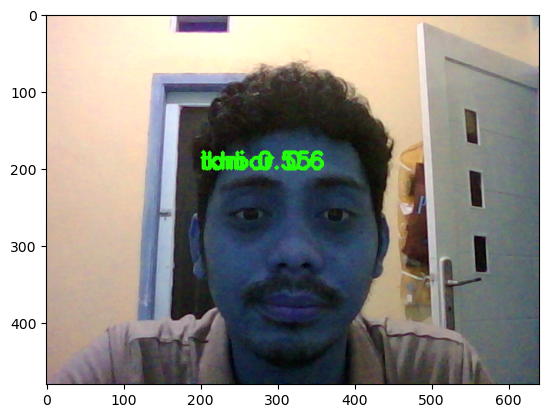

In [33]:
import matplotlib.pyplot as plt
plt.imshow(img)
prepare_to_predict_cam(img,svc_clf)

In [34]:
webcam = cv2.VideoCapture(0)
webcam.set(3,640) # adjust width
webcam.set(4,480) # adjust height

while True:
    success, img = webcam.read()
     # This will open an independent window
    try:
        cv2.imshow("Webcam", img)
        key = cv2.waitKey(1)
        if key == ord('s'):
            try:
                img2,nickname = prepare_to_predict_cam(img,svc_clf)
                img2.shape
                webcam.release()
                    # img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
                cv2.imshow("Webcam", img2)
                path_,date_ = add_attendance(nickname)
                try:
                    image_path = 'data_staff/image_attendance/'+date_
                    os.makedirs(image_path)
                except FileExistsError: 
                    pass
                cv2.imwrite(filename=image_path+'/'+path_+'.jpg', img=img2)
                cv2.waitKey(1650)
                cv2.destroyAllWindows()
                print("Processing image...")
                print("Image saved!")
                break
            except (TypeError,AttributeError) as e:
                img = cv2.putText(img, 'COBA LAGI YA :))', (100, 200-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (125,100,12), 2)
                cv2.imshow('Webcam',img)
                cv2.waitKey(1650)
                pass
        elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break

    except ValueError:
        img = cv2.putText(img, 'COBA LAGII', (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (36,255,12), 3)
        cv2.imshow('Webcam',img) 
        pass

Welcome ikhbar, attendance time: 06/01/2023 20:44:03
Processing image...
Image saved!


In [35]:
# For webcam input:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
cap = cv2.VideoCapture(0)
with mp_face_mesh.FaceMesh(
    max_num_faces=2,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image)

    # Draw the face mesh annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_face_landmarks:
      for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_contours_style())
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_iris_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Face Mesh', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF==ord('q'):
      cap.release()
      cv2.destroyAllWindows()
      break
cap.release()

In [55]:
from PIL import Image
import numpy as np

tes_nump = np.asarray(Image.open(r'data_image\ikhbar\ikh_selfiee.jpg'))
tes_nump = tes_nump.tolist()

In [43]:
import numpy as np
import codecs, json 

a = np.arange(10).reshape(2,5) # a 2 by 5 array
b = a.tolist() # nested lists with same data, indices
file_path = "path.json" ## your path variable
json.dump(b, codecs.open(file_path, 'w', encoding='utf-8'), 
          separators=(',', ':'), 
          sort_keys=True, 
          indent=4) ### this saves the array in .json format
with open(file_path,'rb') as f:
    aa_json = json.load(f)

aa_json

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]]

In [61]:
def jupyter_upload(token, list_, resourceDstPath, jupyterUrl='https://ptcsys-10-254-50-50.webredirect.org/bpjs-poc/bpjs-jupyter6'):
    """
        Uploads File to Jupyter Notebook Server
        ----------------------------------------
        :param token:
            The authorization token issued by Jupyter for authentification 
            (enabled by default as of version 4.3.0)
        :param filePath:
            The file path to the local content to be uploaded

        :param resourceDstPath:
            The path where resource should be placed.
            The destination directory must exist.

        :param jupyterUrl:
            The url to the jupyter server. Default value is typical localhost installation.

        :return: server response

    """
    import os
    import base64
    import urllib
    import codecs,json
    import requests
    import numpy as np

    dstPath = urllib.parse.quote(resourceDstPath)
    dstUrl = '%s/lab/workspaces/auto-s/tree/%s' % (jupyterUrl, dstPath)
    # fileName = filePath[1 + filePath.rfind(os.sep):]
    headers = {}
    headers['Authorization'] = 'token '+token
    # tes_nump = np.asarray(Image.open(filePath))
    # tes_nump = tes_nump.tolist()
    file_path = "file_send.json" ## your path variable
    json.dump(list_, codecs.open(file_path, 'w', encoding='utf-8'), 
          separators=(',', ':'), 
          sort_keys=True, 
          indent=4) ### this saves the array in .json format
    with open(file_path,'rb') as f:
        body = json.load(f)
    # with open(filePath, 'rb') as myfile:
    #     data=myfile.read()
    #     b64data=base64.decodebytes(data)
        # body = json.dumps({
        #     'content':b64data,
        #     'name': fileName,
        #     'path': resourceDstPath,
        #     'format': 'base64',
        #     'type':'file'
        # })
    return requests.put(dstUrl, data=body, headers=headers ,verify=True)

In [62]:
jupyter_upload('e8538cc0273aab442e44028600b4bf1494de0eb714666eec',tes_nump,'work')

ValueError: too many values to unpack (expected 2)

In [36]:
from PIL import Image
import numpy as np

tes_nump = np.asarray(Image.open(r'data_image\ikhbar\ikh_selfiee.jpg'))

In [ ]:
https://ptcsys-10-254-50-50.webredirect.org/bpjs-poc/bpjs-jupyter6/lab/workspaces/auto-s/tree/work